In [1]:
## Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [2]:
## Generate a dataset
X,Y=make_classification(n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1)

In [5]:
## Make dataframe 
data=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
data['target']=Y
data.head()

,col1,col2,col3,col4,col5,target
0,2.289368,2.159250,1.892512,-1.985601,-0.640612,1
1,0.998037,0.924040,0.722725,-1.288675,1.837396,1
2,0.092114,-0.244019,1.263569,-0.376398,0.931911,1
3,1.378828,1.305257,0.199623,-1.574562,2.023838,1
4,0.055511,0.094252,0.018825,-0.412186,1.736770,1


In [6]:
## Function for row sampling
def sampling_rows(data,percent):
    return data.sample(int(percent*data.shape[0]),replace=True)

In [60]:
## Function for column sampling
import random
def sampling_features(data,percent):
    cols=random.sample(data.columns.tolist()[:-1],(percent*(data.shape[1]-1)))
    new_df=data[cols]
    new_df['target']=data['target']
    return new_df

In [11]:
## Function for combined sampling
def combined_sampling(data,row_percent,col_percent):
    new_df=sampling_rows(data,row_percent)
    return sampling_features(new_df,col_percent)

We will create a random forest with 3 decision trees. These 3 decision trees will get 3 different datasets.

In [14]:
data.shape

(100, 6)

In [44]:
## Dataset 1
## 10% rows for sample will be represented by 0.1.
df1=sampling_rows(data,0.2) 

## The samples generated here are with replacement so possibility of duplicate rows will be there.

In [45]:
## Dataset 2
df2=sampling_rows(data,0.2)

In [46]:
## Dataset 3
df3=sampling_rows(data,0.2)

In [47]:
print(df1.shape,df2.shape,df3.shape)

(20, 6) (20, 6) (20, 6)


In [48]:
## Create 3 decision trees
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [49]:
## Train all 3 Decision trees with generated data
clf1.fit(df1.iloc[:,:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [50]:
## Plot all 3 tress
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.006\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.5, 'x[1] <= 1.057\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

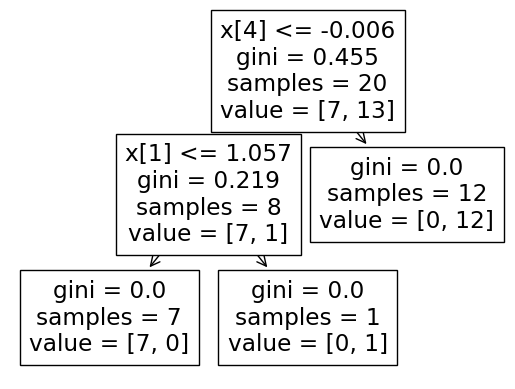

In [51]:
## Plot tree 1
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'x[0] <= 0.419\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.4, 0.5, 'x[4] <= 2.34\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

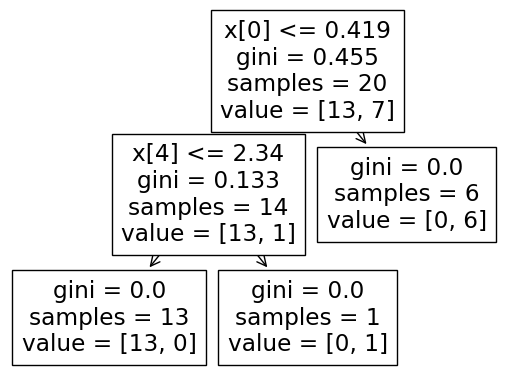

In [52]:
## Plot tree 2
plot_tree(clf2)

[Text(0.5, 0.75, 'x[4] <= -0.653\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]')]

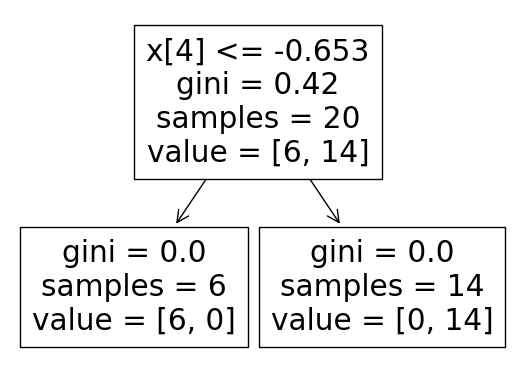

In [53]:
## Plot tree 3
plot_tree(clf3)

In [54]:
data.iloc[0,:]

col1      2.289368
col2      2.159250
col3      1.892512
col4     -1.985601
col5     -0.640612
target    1.000000
Name: 0, dtype: float64

In [55]:
## Prediction Decision tree 1
clf1.predict(np.array([2.289368,2.159250,1.892512,1.985601,0.640612]).reshape(1,5))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [57]:
## Prediction Decision tree 2
clf2.predict(np.array([2.289368,2.159250,1.892512,1.985601,0.640612]).reshape(1,5))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [58]:
## Prediction Decision tree 1
clf3.predict(np.array([2.289368,2.159250,1.892512,1.985601,0.640612]).reshape(1,5))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Now among 3 decision tree prerdictions,all 3 decision trees are predicting 1,so 1 will be our output.

In above case we did row sampling ,similarly we can do column sampling and combined sampling.